# Développement du modèle

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
# Charger les données
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [130]:
df = pd.read_csv(url)
data = df.copy()

## Préparation des données

In [131]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

trainset.shape, testset.shape

((712, 12), (179, 12))

In [132]:
trainset.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

## Encoding

In [133]:
# Female and male encoding
trainset["Sex"] = trainset["Sex"].map({
    "female": 0,
    "male": 1
})

# Embarked encoding as one-hot encoding
trainset = pd.get_dummies(trainset, columns=["Embarked"], prefix="Embarked")

## Impute missing values

In [134]:
# Drop missing age values
trainset.dropna(subset=["Age"], inplace=True)

# Impute missing values for age
# trainset["Age"].fillna(trainset["Age"].mean(), inplace=True)  # Remplace NaN par la moyenne
# trainset["Age"].fillna(trainset["Age"].median(), inplace=True)  # Remplace NaN par la médiane

## Train/Test split

In [135]:
X, y = trainset.drop("Survived", axis=1), trainset["Survived"]
X.shape, y.shape

((568, 10), (568,))

## Model Development

In [136]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)

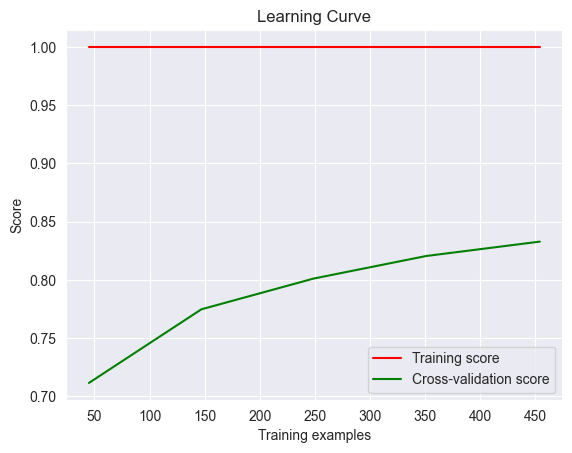

In [137]:
# plot curve
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, random_state=1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


Meilleur stratégie : 
- Ne pas prendre en compte les ages manquants
- Sur un RandomForest